source : https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch10/ch10.ipynb

In [1]:
%load_ext watermark
%watermark -a "Himansu Sahoo" -u -d -v -p numpy,pandas,matplotlib,sklearn,seaborn

Himansu Sahoo 
last updated: 2019-01-20 

CPython 3.6.6
IPython 6.1.0

numpy 1.15.3
pandas 0.23.4
matplotlib 2.2.2
sklearn 0.20.0
seaborn 0.9.0


In [68]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
%matplotlib inline

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

https://gist.github.com/oculushut/193a7c2b6002d808a791

In [4]:
url='https://raw.githubusercontent.com/rasbt/' +\
    'python-machine-learning-book-2nd-edition' +\
    '/master/code/ch10/housing.data.txt'

In [5]:
#filename, headers = urllib.request.urlretrieve(url, "housing.data.txt")

In [6]:
#filename # 'housing.data.txt'

In [7]:
#headers.items()

```
[('Content-Security-Policy',
  "default-src 'none'; style-src 'unsafe-inline'; sandbox"),
 ('Strict-Transport-Security', 'max-age=31536000'),
 ('X-Content-Type-Options', 'nosniff'),
 ('X-Frame-Options', 'deny'),
 ('X-XSS-Protection', '1; mode=block'),
 ('ETag', '"b488787b8ed4cef8e09014dbb51582e4a51fe9e1"'),
 ('Content-Type', 'text/plain; charset=utf-8'),
 ('Cache-Control', 'max-age=300'),
 ('X-Geo-Block-List', ''),
 ('X-GitHub-Request-Id', 'C04C:3C59:4340DF:484BC4:5C3ABE4D'),
 ('Content-Length', '49081'),
 ('Accept-Ranges', 'bytes'),
 ('Date', 'Sun, 13 Jan 2019 04:30:02 GMT'),
 ('Via', '1.1 varnish'),
 ('Connection', 'close'),
 ('X-Served-By', 'cache-atl6233-ATL'),
 ('X-Cache', 'HIT'),
 ('X-Cache-Hits', '1'),
 ('X-Timer', 'S1547353802.150938,VS0,VE1'),
 ('Vary', 'Authorization,Accept-Encoding'),
 ('Access-Control-Allow-Origin', '*'),
 ('X-Fastly-Request-ID', 'f5b435ddab7c5cd588683669f2b0b247756dff74'),
 ('Expires', 'Sun, 13 Jan 2019 04:35:02 GMT'),
 ('Source-Age', '125')]
```

In [8]:
# df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
#                  'python-machine-learning-book-2nd-edition'
#                  '/master/code/ch10/housing.data.txt',
#                  header=None,
#                  sep='\s+')

In [9]:
os.getcwd()

'C:\\Users\\hisahoo.ISC\\Desktop\\Datascience\\Weekly-DS-meeting\\MLSebastianRaschka\\Ch10_LinearRegression'

In [10]:
data_dir = "dataset"
os.listdir("../"+os.sep+data_dir)

['housing.data.txt', 'iris.csv', 'iris.data.txt']

In [11]:
df = pd.read_csv("../"+os.sep+data_dir+os.sep+"housing.data.txt", header=None, sep="\s+")

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
df.shape # (506, 14)

(506, 14)

In [16]:
X = df[['RM']].values # notice X has y dimension
y = df['MEDV'].values
print("X shape : ", type(X), " ", X.shape)
print("y shape : ", type(y), " ", y.shape)

X shape :  <class 'numpy.ndarray'>   (506, 1)
y shape :  <class 'numpy.ndarray'>   (506,)


#### Build Scikit-learn Model with one variable

In [17]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0]) # Slope: 9.102
print('Intercept: %.3f' % slr.intercept_) # Intercept: -34.671

Slope: 9.102
Intercept: -34.671


In [18]:
slr.score(X, y) # R2 score : 0.4835254559913343

0.4835254559913343

In [19]:
slr.coef_ # only contains slope

array([9.10210898])

In [20]:
slr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print(dir(slr))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_decision_function', '_estimator_type', '_get_param_names', '_preprocess_data', '_residues', '_set_intercept', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_jobs', 'normalize', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [22]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

In [23]:
def lin_regplot_inverse(X, y, model, stdxscaler=None, stdyscaler=None):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    if stdxscaler:
        X_std = stdxscaler.transform(X)
        plt.plot(X, stdyscaler.inverse_transform(model.predict(X_std)), color='black', lw=2)
    else:
        plt.plot(X, model.predict(X), color='black', lw=2)
    return

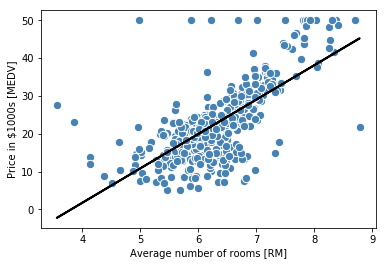

In [24]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

#### Scikit-learn with standardized features

In [25]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() # w/o flatten(), its shape is (506, 1)
print("X_std shape : ", type(X_std), " ", X_std.shape)
print("y_std shape : ", type(y_std), " ", y_std.shape)

X_std shape :  <class 'numpy.ndarray'>   (506, 1)
y_std shape :  <class 'numpy.ndarray'>   (506,)


In [26]:
slr_std = LinearRegression()
slr_std.fit(X_std, y_std)
y_pred_std = slr_std.predict(X_std)
print('Slope: %.3f' % slr_std.coef_[0]) # Slope: 0.695
print('Intercept: %.3f' % slr_std.intercept_) # Intercept: -0.000

Slope: 0.695
Intercept: -0.000


In [67]:
print("MSE : ", mean_squared_error(y_std, y_pred_std))

MSE :  0.5164745440086659


<b> Feature Scaling two types : <br>
    Normalization : min-max scaling, feature range is [0,1] <br>
    Standardization : feature takes normal shape, 0 mean, 1 std, same as z-score <br>
Note that intercept is 0 if we will standrdize the features </b>

In [27]:
slr_std.score(X_std, y_std) # 0.483525455991334

0.483525455991334

R2 score is same as un-standardized.

In [28]:
slr_std.coef_ # this only contains slope, w1

array([0.69535995])

<b>
since the data is standardized, we need to transform X, then predict, then inverse_transform(pred)
</b>

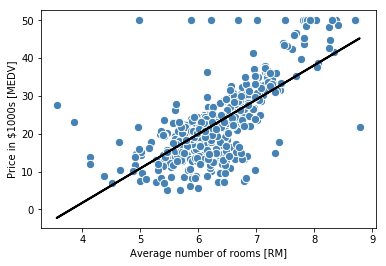

In [29]:
#lin_regplot(X_std, y_std, slr_std) # works, as we are showing all in standard variables

###lin_regplot(X, y, slr_1) # instead of original X, y get them from X_std, y_std through inverse_transform
#X_org = sc_x.inverse_transform(X_std)
#y_org = sc_y.inverse_transform(y_std)
#lin_regplot(X_org, y_org, slr_std) # doesn't look right, as you didn't do inverse transform of fitted y

lin_regplot_inverse(X, y, model=slr_std, stdxscaler=sc_x, stdyscaler=sc_y)

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

### Using Normal Equation method

In [30]:
# print(X.shape) # the above inverse is changing dimension of X. (506, 1)
# Xb = np.hstack((np.ones((X.shape[0], 1)), X))
# print(Xb.shape) # (506, 2)
# #w = np.zeros(X.shape[1])
# #w.shape # (1,)
# z = np.linalg.inv(np.dot(Xb.T, Xb)) # (2, 506) x (506, 2) = results in (2, 2) matrix
# z.shape # (2, 2)
# w = np.dot(z, np.dot(Xb.T, y)) # (2, 506) x (506,) # results in (2, ) matrix
# w.shape # (2,)

In [31]:
#print(z)
#print(w)

The above is replaced with OLS function below.

In [32]:
def OLS(X, y):
    Xb = np.hstack((np.ones((X.shape[0], 1)), X))
    z = np.linalg.inv(np.dot(Xb.T, Xb))
    w = np.dot(z, np.dot(Xb.T, y))
    return w

In [33]:
w = OLS(X, y)

In [34]:
print('Slope: %.3f' % w[1]) # Slope: 9.102
print('Intercept: %.3f' % w[0]) # Intercept: -34.671

Slope: 9.102
Intercept: -34.671


In [35]:
OLS(X_std, y_std)

array([-3.54779334e-16,  6.95359947e-01])

In [ ]:
### using numpy lstsq

In [66]:
A1 = np.hstack((np.ones((X_std.shape[0], 1)), X_std))
np.linalg.lstsq(A1, y_std, rcond=None)

(array([-5.23747982e-16,  6.95359947e-01]),
 array([261.33611927]),
 2,
 array([22.49444376, 22.49444376]))

In [69]:
scipy.linalg.lstsq(A1, y_std, cond=None)

(array([-5.23747982e-16,  6.95359947e-01]),
 261.33611926838495,
 2,
 array([22.49444376, 22.49444376]))

#### Multiple Linear Regression using scikit-learn

In [36]:
X1 = df.iloc[:, :-1].values
y1 = df['MEDV'].values

In [37]:
print("X shape ", type(X1), " ", X1.shape)
print("y shape ", type(y1), " ", y1.shape)

X shape  <class 'numpy.ndarray'>   (506, 13)
y shape  <class 'numpy.ndarray'>   (506,)


#### Below is multiple linear regression to full dataset

In [38]:
MLR = LinearRegression()
MLR.fit(X1, y1)
y_pred_multi = MLR.predict(X1)
print('Slope: %.3f' % MLR.coef_[5]) # Slope: 3.810, 5th entry in RM feature
print('Intercept: %.3f' % MLR.intercept_) # Intercept: 36.459
print("R2 score: %.3f" % MLR.score(X1, y1)) # R2 score: 0.741, improved from 0.48 to 0.741
#print("R2 score: %.3f" % MLR.score(X1, y_pred_multi)) # wrong.. don't give y_pred here, it will give 1.

Slope: 3.810
Intercept: 36.459
R2 score: 0.741


#### see R2 is 1.0, it is over-fitting

In [39]:
MLR.coef_ # 13 elements, only weights

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [40]:
df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [41]:
MLR.coef_[5]

3.8098652068092176

took the slope, intercept from multiple regression for feature 5, plotted with data... doesnt fit well.

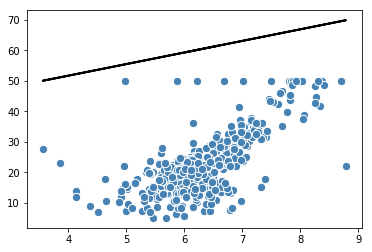

In [42]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
y_mlr = MLR.intercept_ + MLR.coef_[5] * X
plt.plot(X, y_mlr, color='black', lw=2)   

#### Can you apply Normal Equation to multi dimensional data?
yes, this matches well with the result from scikit-learn.

In [43]:
# X1.shape 
# Xb = np.hstack((np.ones((X1.shape[0], 1)), X1))
# Xb.shape # (506, 2)
# z = np.linalg.inv(np.dot(Xb.T, Xb)) # (2, 506) x (506, 2) = results in (2, 2) matrix
# z.shape # (2, 2)
# w = np.dot(z, np.dot(Xb.T, y1)) # (2, 506) x (506,) # results in (2, ) matrix
# w.shape # (2,)

In [44]:
# print(z.shape)
# print(w) # here 14 elements, first element is intercept

In [45]:
OLS(X1, y1) # OLS added extra term 0th slope

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

```
array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])
```

### using numpy lstsq gives same result

In [70]:
A2 = np.hstack((np.ones((X1.shape[0], 1)), X1))
np.linalg.lstsq(A2, y1, rcond=None)

(array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
        -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
         9.31168327e-03, -5.24758378e-01]),
 array([11078.78457795]),
 14,
 array([1.25852008e+04, 3.44597543e+03, 6.45757200e+02, 4.02053125e+02,
        1.58964789e+02, 1.21505890e+02, 9.04665132e+01, 7.79630718e+01,
        6.50981430e+01, 2.46264969e+01, 1.81386150e+01, 5.51526415e+00,
        1.64836367e+00, 8.32711559e-01]))

### Do train/test split 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [47]:
slr1 = LinearRegression()
slr1.fit(X_train, y_train)
y_train_pred = slr1.predict(X_train)
y_test_pred = slr1.predict(X_test)

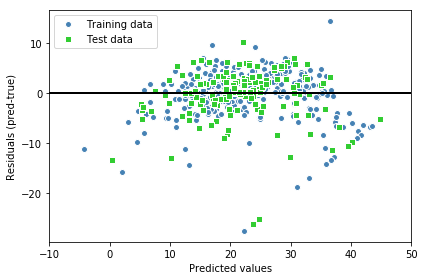

In [48]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (pred-true)')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

<b>
SSE : Sum of Squared Error <br>
MSE : Mean Squared Error
$$
MSE = \frac{1}{N}\sum_i(y_i-y_i^{pred})^2 = \frac{SSE}{N}
$$
</b>

In [49]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


In [50]:
slr.score(X, y) # SLR : Simple Linear Regression 0.4835254559913343

0.4835254559913343

In [51]:
#slr.score(X1, y1) # you can't test a model trained with 1 variable to 13 variables

In [52]:
slr1.score(X1, y1) # Multiple Linear Regression, using all features 0.7378284679886171

0.7378284679886171

In [53]:
slr.predict(np.array([[5]])) # you need to have both dimensions to predict
#np.array([10]).shape # (1,)
#np.array([[10]]).shape # (1, 1)

array([10.83992413])

##### see R2 is increased from 0.48 in simple Regression, to 0.74 in Multiple Regression

In [54]:
print('R^2 train: %.3f, test: %.3f' % ( slr1.score(X_train, y_train), slr1.score(X_test, y_test) ))
# R^2 train: 0.765, test: 0.673

R^2 train: 0.765, test: 0.673


train_set R2 is similiar to full dataset, however in test set it is decreased to 0.673.

#### LASSO Regression
LASSO regression adds the sum absolute value of weights. some of the weights may become zero. used as supervised feature selection technique.<br>
RIDGE regression adds the squared sum of the weights.

In [55]:
#lasso = Lasso(alpha=0.1)
#lasso = Lasso(alpha=1.0)
#lasso = Ridge(alpha=1.0)
lasso = ElasticNet(alpha=1.0, l1_ratio=0.5)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.08344408  0.05179376 -0.01702468  0.         -0.          0.90890973
  0.01218953 -0.83010765  0.23558231 -0.01502425 -0.84881663  0.00687826
 -0.72504946]


In [56]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 24.381, test: 31.874
R^2 train: 0.712, test: 0.617


```
MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653
```

#### Polynomial Regression

In [57]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [58]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [59]:
print(X.shape)
X

(10, 1)


array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [60]:
print(X_quad.shape)
X_quad

(10, 3)


array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [61]:
np.array([1,2,3])

array([1, 2, 3])

In [62]:
test=np.array([1,2,3])[:,np.newaxis]
test.shape # (3, 1)
test

array([[1],
       [2],
       [3]])

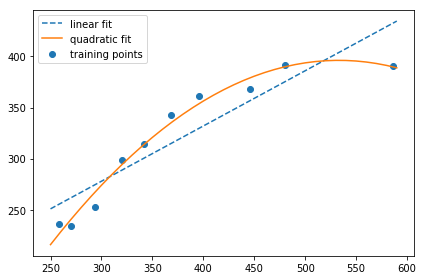

In [63]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit)) # you transform X, then predict

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_10.png', dpi=300)
plt.show()

In [64]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [65]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982
